##Part 1: CIFAR10 Classification

Follow along the tutorial for CIFAR10 classification found here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.

In [17]:
# Load the CIFAR10 data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


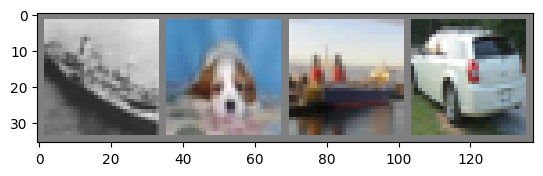

ship  dog   ship  car  


In [18]:
# Visualize the data
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
  img = img / 2 + 0.5  
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
    

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [19]:
# Define the mdoel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [20]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [25]:
# Train the network
for epoch in range(4):  # Loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.944
[1,  4000] loss: 0.964
[1,  6000] loss: 0.973
[1,  8000] loss: 0.959
[1, 10000] loss: 0.988
[1, 12000] loss: 0.990
[2,  2000] loss: 0.902
[2,  4000] loss: 0.893
[2,  6000] loss: 0.933
[2,  8000] loss: 0.942
[2, 10000] loss: 0.946
[2, 12000] loss: 0.937
[3,  2000] loss: 0.856
[3,  4000] loss: 0.870
[3,  6000] loss: 0.901
[3,  8000] loss: 0.888
[3, 10000] loss: 0.910
[3, 12000] loss: 0.901
[4,  2000] loss: 0.809
[4,  4000] loss: 0.836
[4,  6000] loss: 0.852
[4,  8000] loss: 0.861
[4, 10000] loss: 0.865
[4, 12000] loss: 0.872
Finished Training


In [26]:
# Test the network
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = net(images)
        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 62 %


Train more epochs by editing the code above. Can you get the accuracy better than 60%? Write your answer below in code or text form.

The accuracy increased to 62% when changing the following line:

'for epoch in range(2):'

to:

for epoch in range(4):


Epoch size increases accuracy because the weights are changed in the neural network. As the epoch size increases, the model goes from underfitting to optimal. If you continue to increase the epoch size beyond optimal, the model becomes overfit and will not return a higher accuracy for the test set. The optimal epcoh size results in the lowest error rate for the training set. 

##Part 2: SVHN Classification 
Follow the tutorial from above, replicating steps using the SVHN dataset instead of the CIFAR10. 

In [12]:
# Load the SVHN data
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets



transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 32

trainset = datasets.SVHN(root='data/', download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = datasets.SVHN(root='./data', download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Do not need the classes variable as there is no need to visualize

100%|██████████| 182040794/182040794 [00:06<00:00, 29926420.40it/s]


Using downloaded and verified file: ./data/train_32x32.mat


In [13]:
# Define the mdoel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [14]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
# Train the network
for epoch in range(4):  # Loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.577
[2,  2000] loss: 0.680
[3,  2000] loss: 0.532
[4,  2000] loss: 0.466
Finished Training


In [18]:
# Test the network
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = net(images)
        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %


Can you get a better accuracy than your Homework 3? Write your answer below in code or text form. 

Yes I got a much better accuracy than on Homework 3. My Homework 3 accuracy was around 20% and the accuracy with this neural network is around 88%. This could be a result of testing different epochs within the neural network allowing for a more optimal model compared to the RidgeClassifier, MLPClassifier, LinearSVC or KMeans. 